<a href="https://colab.research.google.com/github/LandonAmickUNCC/ECGR4105/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Landon Amick 801293791 Homework 3 https://github.com/LandonAmickUNCC/ECGR4105

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Setting and Checking data**

In [77]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [78]:
# Define features (X) and target (y) for the diabetes dataset
X_diabetes = df.drop('Outcome', axis=1)
y_diabetes = df['Outcome']

# Split the diabetes data into training and testing sets
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=0)

# Create a scaler object
sc_d = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std_d = sc_d.fit_transform(X_train_d)

# Apply the scaler to the test data
X_test_std_d = sc_d.transform(X_test_d)

# Define a list of C values to experiment with
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in c_values:
    # Use the defined C value in the LogisticRegression model
    # Using liblinear solver with L1 penalty
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    # Fit the model using standardized training data for diabetes dataset
    clf.fit(X_train_std_d, y_train_d)
    print('C:', c)
    # Evaluate the model using standardized training and testing data for diabetes dataset
    print('Training accuracy:', clf.score(X_train_std_d, y_train_d))
    print('Test accuracy:', clf.score(X_test_std_d, y_test_d))
    print('')

C: 0.001
Training accuracy: 0.6400651465798045
Test accuracy: 0.6948051948051948

C: 0.01
Training accuracy: 0.7052117263843648
Test accuracy: 0.7012987012987013

C: 0.1
Training accuracy: 0.762214983713355
Test accuracy: 0.8181818181818182

C: 1
Training accuracy: 0.7654723127035831
Test accuracy: 0.8246753246753247

C: 10
Training accuracy: 0.762214983713355
Test accuracy: 0.8246753246753247

C: 100
Training accuracy: 0.762214983713355
Test accuracy: 0.8246753246753247



In [79]:
# Create a KFold instance
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = LogisticRegression(solver='liblinear')
# Use the diabetes dataset variables
results = cross_val_score(model, X_diabetes, y_diabetes, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.086% (5.091%)


Part 1


In [80]:
# Construct a confusion matrix
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, y_diabetes, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[98  9]
 [19 28]]


In [81]:
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, y_diabetes, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



Text(0.5, 427.9555555555555, 'Predicted label')

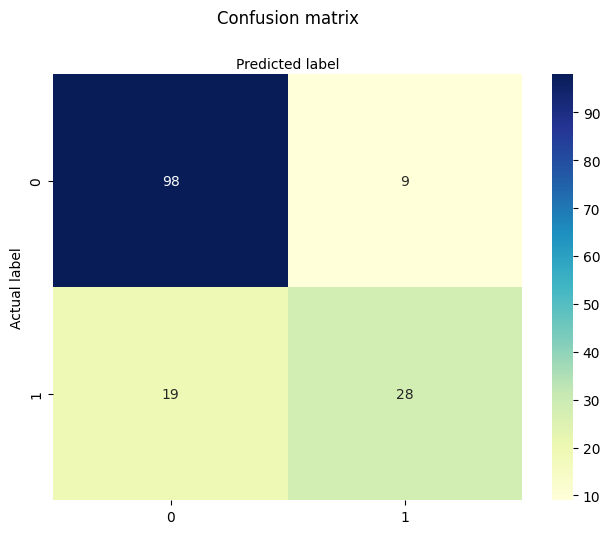

In [82]:
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Unfortunately when using SKLearn we are unable to show our iterations as we do not have access to the underlying module that gives us access to the individual step processes of the learning for the algorithm.

Part 2A

In [83]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
# Define features (X) and target (y) for the breast cancer dataset
X_breast = breast_data
y_breast = breast.target

# Split the breast cancer data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_breast, y_breast, test_size=0.2, random_state=0)

# Create a scaler object
sc_b = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std_b = sc_b.fit_transform(X_train_b)

# Apply the scaler to the test data
X_test_std_b = sc_b.transform(X_test_b)

# Define a list of C values to experiment with
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

for c in c_values:
    # Use the defined C value in the LogisticRegression model
    # Using liblinear solver with L1 penalty
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    # Fit the model using standardized training data for breast cancer dataset
    clf.fit(X_train_std_b, y_train_b)
    print('C:', c)
    # Evaluate the model using standardized training and testing data for breast cancer dataset
    print('Training accuracy:', clf.score(X_train_std_b, y_train_b))
    print('Test accuracy:', clf.score(X_test_std_b, y_test_b))
    print('')

C: 0.001
Training accuracy: 0.3626373626373626
Test accuracy: 0.41228070175438597

C: 0.01
Training accuracy: 0.9274725274725275
Test accuracy: 0.9210526315789473

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C: 1
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C: 10
Training accuracy: 0.989010989010989
Test accuracy: 0.9473684210526315

C: 100
Training accuracy: 0.9956043956043956
Test accuracy: 0.9473684210526315



In [85]:
# Create a KFold instance
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = LogisticRegression(solver='liblinear')
# Use the diabetes dataset variables
results = cross_val_score(model, X_breast, y_breast, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.727% (2.718%)


In [86]:
# Construct a confusion matrix
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_breast, y_breast, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[46  1]
 [ 4 63]]


In [87]:
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_breast, y_breast, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 427.9555555555555, 'Predicted label')

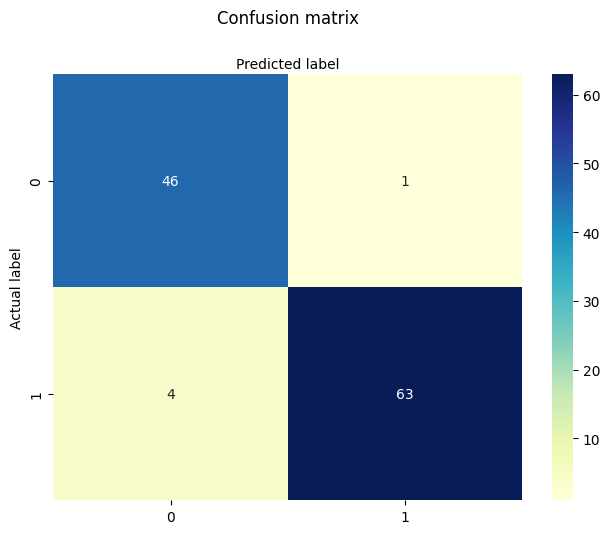

In [88]:
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Again iterative calculations are not avaliable as the sklearn library doesn't give us access to that information.

Problem 2B

In [89]:
# Repeat the process from Part 2A with L2 weight penalty

# Define features (X) and target (y) for the breast cancer dataset
X_breast = breast_data
y_breast = breast.target

# Split the breast cancer data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_breast, y_breast, test_size=0.2, random_state=0)

# Create a scaler object
sc_b = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std_b = sc_b.fit_transform(X_train_b)

# Apply the scaler to the test data
X_test_std_b = sc_b.transform(X_test_b)

# Define a list of C values to experiment with
c_values = [0.001, 0.01, 0.1, 1, 10, 100]

print("Logistic Regression with L2 Penalty:")
for c in c_values:
    # Use the defined C value in the LogisticRegression model
    # Using liblinear solver with L2 penalty
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    # Fit the model using standardized training data for breast cancer dataset
    clf.fit(X_train_std_b, y_train_b)
    print('C:', c)
    # Evaluate the model using standardized training and testing data for breast cancer dataset
    print('Training accuracy:', clf.score(X_train_std_b, y_train_b))
    print('Test accuracy:', clf.score(X_test_std_b, y_test_b))
    print('')

Logistic Regression with L2 Penalty:
C: 0.001
Training accuracy: 0.9560439560439561
Test accuracy: 0.9122807017543859

C: 0.01
Training accuracy: 0.9736263736263736
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9868131868131869
Test accuracy: 0.9649122807017544

C: 1
Training accuracy: 0.989010989010989
Test accuracy: 0.9649122807017544

C: 10
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C: 100
Training accuracy: 0.989010989010989
Test accuracy: 0.9473684210526315



In [90]:
# Create a KFold instance
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Use Logistic Regression with L2 penalty
model = LogisticRegression(solver='liblinear', penalty='l2')
# Use the breast cancer dataset variables
results = cross_val_score(model, X_breast, y_breast, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.727% (2.718%)


In [91]:
# Construct a confusion matrix
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_breast, y_breast, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear', penalty='l2')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[46  1]
 [ 4 63]]


In [92]:
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_breast, y_breast, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear', penalty='l2')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 427.9555555555555, 'Predicted label')

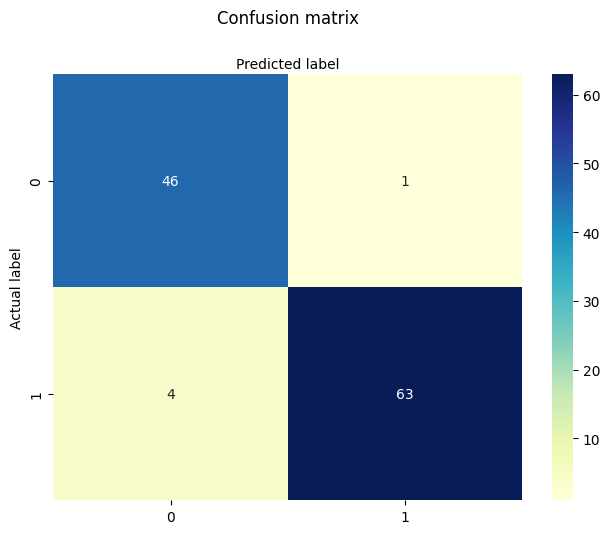

In [93]:
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Adding a weight penalty doesn't affect the actual outcome all that much but it does move the accuracy by a small margin. It does not however seem to adjust the outcome of the prediction model in any way (at least with this small of a dataset).